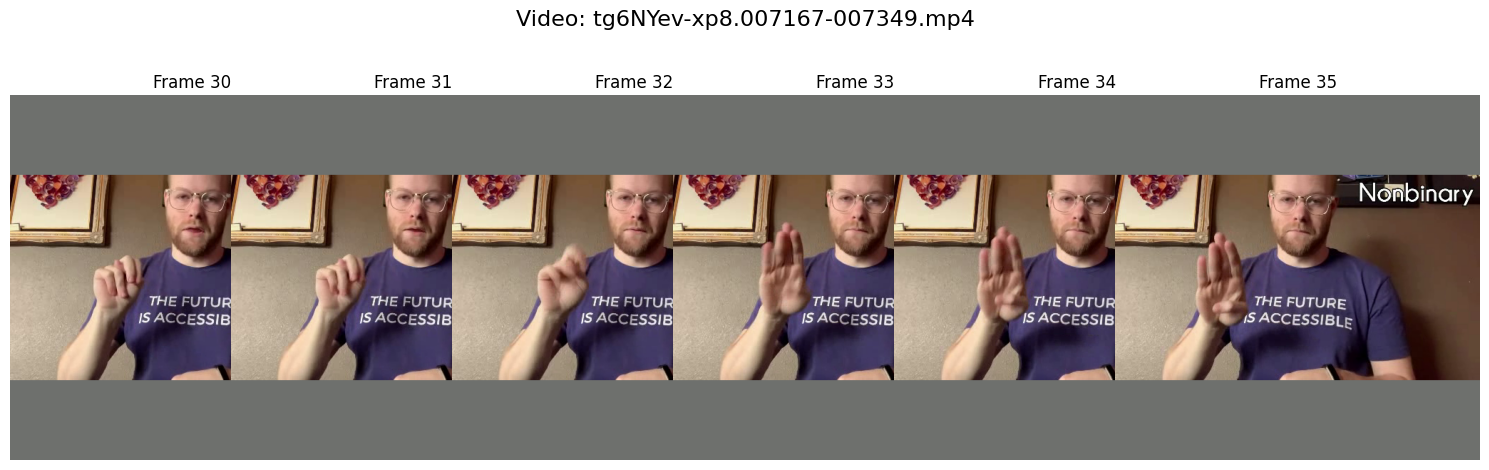

In [20]:
import av
import matplotlib.pyplot as plt
import os

videoID ="tg6NYev-xp8.007167-007349"

start_frame = 30
end_frame = 35

folder = "/auto/plzen4-ntis/projects/korpusy_cv/JSALT/YouTubeASL/clips_cropped_ocr"
filename = f"{videoID}.mp4"
video_path = os.path.join(folder, filename)

container = av.open(video_path)
frames = []
frame_idx = 0

# Decode video frames and collect the desired range
for frame in container.decode(video=0):
    if start_frame <= frame_idx <= end_frame:
        img = frame.to_ndarray(format='rgb24')
        frames.append((frame_idx, img))
    frame_idx += 1
    if frame_idx > end_frame:
        break

if not frames:
    raise ValueError("No frames found in the specified range.")

# Plot frames side-by-side
fig, axs = plt.subplots(1, len(frames), figsize=(15, 5))
for ax, (f_idx, img) in zip(axs, frames):
    ax.imshow(img)
    ax.set_title(f"Frame {f_idx}")
    ax.axis('off')

fig.suptitle(f"Video: {filename}", fontsize=16)
plt.subplots_adjust(top=0.125)

plt.tight_layout()
plt.show()